In [1]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
id_seismic=pd.read_csv('seismic.CSV')
id_seismic

,INDEX,watershed,POPULATION_2010,S_risk,S_risk_level,S_ESTFAC_WITHIN25MI,S_GROUND_ACCEL_LOW,S_GA_LOW_MODE,S_GA_MOD,S_GA_MOD_HIGH,S_GA_HIGH,S_% HUC_WITHIN25MILES
0,1,americanfalls,77212,68.29642,H,30,0.04,0.53,0.43,0.00,0.00,0.19
1,2,bear lake,9713,88.48000,H,30,0.00,0.00,0.00,1.00,0.00,1.00
2,3,beaver-camas,2403,51.48504,H,6,0.00,0.08,0.48,0.38,0.05,0.75
3,4,big lost,3998,64.06714,H,13,0.00,0.31,0.29,0.40,0.00,0.98
4,5,big wood,23221,69.79237,H,22,0.15,0.23,0.33,0.28,0.00,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...
79,80,upper selway,0,0.88640,L,0,0.73,0.27,0.00,0.00,0.00,0.00
80,81,upper snake-rock,107887,40.04160,M,0,0.92,0.08,0.00,0.00,0.00,0.00
81,82,upper spokane,99092,43.04920,M,0,0.69,0.31,0.00,0.00,0.00,0.00
82,83,weiser,6771,65.93053,H,16,0.00,0.46,0.54,0.00,0.00,1.00


In [6]:
id_seismic=id_seismic.drop(columns = ['INDEX', 'POPULATION_2010','S_risk','S_risk_level'])
id_seismic

,watershed,S_ESTFAC_WITHIN25MI,S_GROUND_ACCEL_LOW,S_GA_LOW_MODE,S_GA_MOD,S_GA_MOD_HIGH,S_GA_HIGH,S_% HUC_WITHIN25MILES
0,americanfalls,30,0.04,0.53,0.43,0.00,0.00,0.19
1,bear lake,30,0.00,0.00,0.00,1.00,0.00,1.00
2,beaver-camas,6,0.00,0.08,0.48,0.38,0.05,0.75
3,big lost,13,0.00,0.31,0.29,0.40,0.00,0.98
4,big wood,22,0.15,0.23,0.33,0.28,0.00,0.51
...,...,...,...,...,...,...,...,...
79,upper selway,0,0.73,0.27,0.00,0.00,0.00,0.00
80,upper snake-rock,0,0.92,0.08,0.00,0.00,0.00,0.00
81,upper spokane,0,0.69,0.31,0.00,0.00,0.00,0.00
82,weiser,16,0.00,0.46,0.54,0.00,0.00,1.00


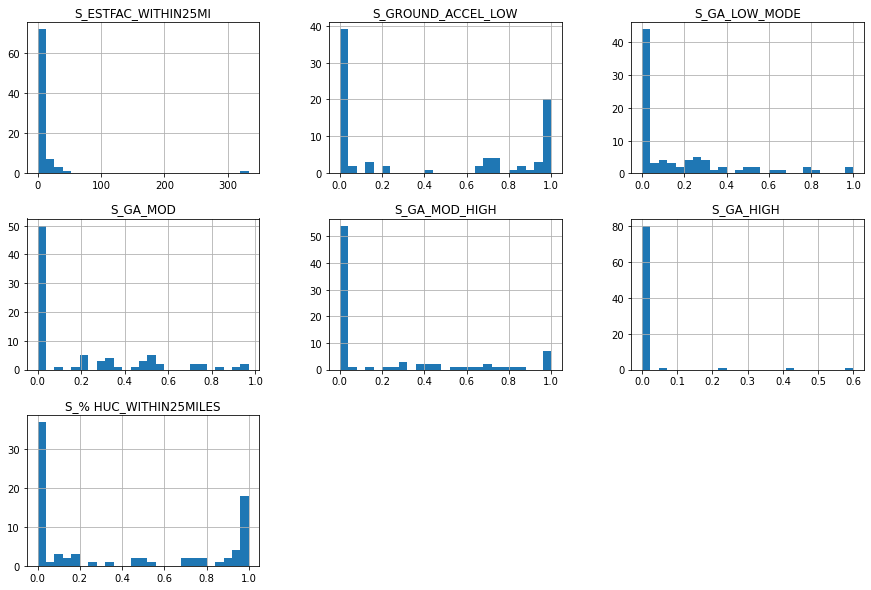

In [13]:
id_seismic.dropna().hist(bins=25,figsize=(15, 10))
plt.savefig('seismicfactors',dpi=600,bbox_inches = 'tight')

In [11]:
from sklearn.preprocessing import StandardScaler
id_seismic_scale= StandardScaler().fit_transform(id_seismic[['S_ESTFAC_WITHIN25MI', 'S_GROUND_ACCEL_LOW','S_GA_LOW_MODE','S_GA_MOD',
                                                              'S_GA_MOD_HIGH','S_GA_HIGH ', 'S_% HUC_WITHIN25MILES']].dropna())
id_seismic_scale

array([[ 0.58688686, -0.83820891,  1.48197536,  0.85667182, -0.63874622,
        -0.18895748, -0.46861515],
       [ 0.58688686, -0.92836198, -0.67204171, -0.69591153,  2.34206948,
        -0.18895748,  1.41026373],
       [-0.06715621, -0.92836198, -0.34690706,  1.03720477,  0.49396374,
         0.42152053,  0.83036285],
       [ 0.12360635, -0.92836198,  0.58785506,  0.35117957,  0.55358006,
        -0.18895748,  1.36387166],
       [ 0.36887251, -0.59028797,  0.26272041,  0.49560593,  0.19588217,
        -0.18895748,  0.27365799],
       [-0.20341518, -0.92836198, -0.59075805,  0.53171252,  1.26897583,
        -0.18895748,  1.41026373],
       [ 0.34162071, -0.92836198, -0.67204171,  0.67613887,  1.17955136,
        -0.06686188,  0.6679906 ],
       [-0.20341518, -0.92836198,  0.01886942,  2.30093541, -0.63874622,
        -0.18895748, -0.53820325],
       [-0.23066698, -0.81567064,  1.88839367,  0.45949934, -0.63874622,
        -0.18895748,  1.29428356],
       [-0.23066698,  1.3254

In [12]:
id_seismic_scale=pd.DataFrame(id_seismic_scale,columns=['S_ESTFAC_WITHIN25MI', 'S_GROUND_ACCEL_LOW','S_GA_LOW_MODE','S_GA_MOD',
                                                              'S_GA_MOD_HIGH','S_GA_HIGH ', 'S_% HUC_WITHIN25MILES'])
id_seismic_scale

,S_ESTFAC_WITHIN25MI,S_GROUND_ACCEL_LOW,S_GA_LOW_MODE,S_GA_MOD,S_GA_MOD_HIGH,S_GA_HIGH,S_% HUC_WITHIN25MILES
0,0.586887,-0.838209,1.481975,0.856672,-0.638746,-0.188957,-0.468615
1,0.586887,-0.928362,-0.672042,-0.695912,2.342069,-0.188957,1.410264
2,-0.067156,-0.928362,-0.346907,1.037205,0.493964,0.421521,0.830363
3,0.123606,-0.928362,0.587855,0.351180,0.553580,-0.188957,1.363872
4,0.368873,-0.590288,0.262720,0.495606,0.195882,-0.188957,0.273658
...,...,...,...,...,...,...,...
79,-0.230667,0.716932,0.425288,-0.695912,-0.638746,-0.188957,-0.909340
80,-0.230667,1.145159,-0.346907,-0.695912,-0.638746,-0.188957,-0.909340
81,-0.230667,0.626778,0.587855,-0.695912,-0.638746,-0.188957,-0.909340
82,0.205362,-0.928362,1.197483,1.253844,-0.638746,-0.188957,1.410264
